In [1]:
import pandas as pd

In [2]:
obs = pd.read_hdf(
    'clean_data.h5',
    'obs',
)

In [3]:
obs.shape

(1426881, 63)

In [4]:
obs.columns.tolist()

['gbifID',
 'identifier',
 'license',
 'modified',
 'references',
 'rightsHolder',
 'occurrenceID',
 'catalogNumber',
 'recordedBy',
 'eventDate',
 'eventTime',
 'year',
 'month',
 'day',
 'verbatimEventDate',
 'countryCode',
 'stateProvince',
 'verbatimLocality',
 'decimalLatitude',
 'decimalLongitude',
 'coordinateUncertaintyInMeters',
 'identificationID',
 'identifiedBy',
 'dateIdentified',
 'taxonID',
 'acceptedNameUsageID',
 'scientificName',
 'phylum',
 'class',
 'order',
 'family',
 'genus',
 'genericName',
 'specificEpithet',
 'taxonRank',
 'taxonomicStatus',
 'publishingCountry',
 'lastInterpreted',
 'issue',
 'mediaType',
 'hasCoordinate',
 'hasGeospatialIssues',
 'taxonKey',
 'acceptedTaxonKey',
 'phylumKey',
 'classKey',
 'orderKey',
 'familyKey',
 'genusKey',
 'speciesKey',
 'species',
 'acceptedScientificName',
 'verbatimScientificName',
 'lastParsed',
 'repatriated',
 'level0Gid',
 'level0Name',
 'level1Gid',
 'level1Name',
 'level2Gid',
 'level2Name',
 'iucnRedListCateg

In [8]:
# Number of unique species within observations
taxon_vc = obs["taxonID"].value_counts()
taxon_vc

48715      30491
54134      24537
55576      21646
940028     20033
47392      20009
           ...  
1006592        1
801824         1
227653         1
155033         1
374837         1
Name: taxonID, Length: 13248, dtype: int64

<AxesSubplot: >

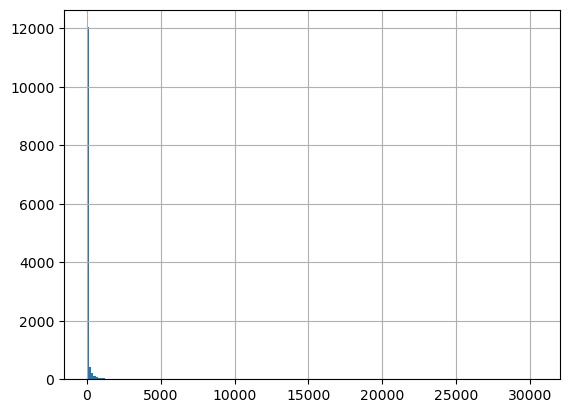

In [31]:
# Distribution of observations per species

# obs['taxonID'].hist() # <-- not a very good depction as taxonID is not a numerical value
taxon_vc.sort_values().hist( bins = 200 )
# x axis is essetially meaningless? but this does show the distribution of value counts

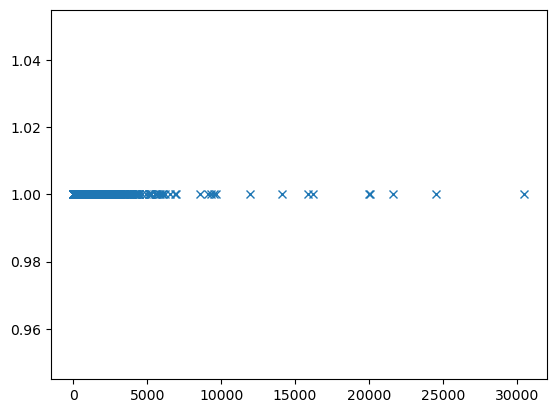

In [32]:
# plot counts on a 1D line graph
import matplotlib.pyplot as pp
pp.plot(taxon_vc, len(taxon_vc) * [1], "x")  # is there a way to do a 1-dimensional plot within pandas?

In [12]:
taxon_vc[ taxon_vc > 5000 ].shape

(32,)

In [16]:
taxon_vc[ taxon_vc > 10000 ].shape

(9,)

In [26]:
taxon_vc[ taxon_vc < 5000 ].shape # note the '<' (less than)

(13216,)

In [24]:
taxon_vc[ taxon_vc > 2500 ].shape

(109,)

In [25]:
taxon_vc[ taxon_vc > 1000 ].shape

(303,)

* First of all, how would I better show this distribution? a histogram sorted by value? there would be too many indiviual items in the x dimension. Also, I 
* It looks like there are only 32 species with more than 5000 observations, which is OK.
  * How many observations per species do we need? Assume one observation equates to 1-4 images of the species (actual data is in the 'multimedia.txt' TSV file which I have yet to explore)
    * This should answer the question of: "How many species can we effectively include in our model?"